In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
#import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
#currently installed theme will be used to
#set plot style if no arguments provided
jtplot.style()

#now load this dataset 
h5f = h5py.File('./datasets/s16_d_siti_2.h5','r')
X = h5f['sizes'][:]
Y = h5f['spectrum'][:]

#get the ranges of the loaded data
num_layers = X.shape[1]
num_lpoints = Y.shape[1]


#this information is not given in the dataset
lam_min = 400
lam_max = 800
lams = np.linspace(lam_min, lam_max, num_lpoints, endpoint=True)

#create a train - test split of the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

print("Dataset has been loaded")
print("x-train", x_train.shape)
print("x-test ", x_test.shape)
print("y-train", y_train.shape)
print("y-test ", y_test.shape)




Dataset has been loaded
x-train (180000, 16)
x-test  (20000, 16)
y-train (180000, 128)
y-test  (20000, 128)


(0, 100)

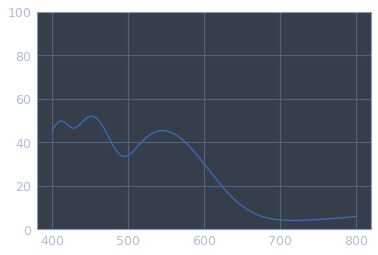

In [7]:
lam_inv = np.linspace(1/400.0, 1/800.0, num=num_lpoints, endpoint=True)
lams = 1.0/lam_inv

plt.plot( lams, y_train[ np.random.randint(0, 9000)    ]  )
plt.ylim(  [0, 100])

In [20]:
import scnets as scn
model = scn.fullycon(in_size=16, 
                     out_size=128, 
                     batch_size=64,
                     N_hidden=3, 
                     N_neurons=512, 
                     N_gpus=3)

model.summary()    


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Dense)                (None, 512)               8704      
_________________________________________________________________
activation_17 (Activation)   (None, 512)               0         
_________________________________________________________________
H0 (Dense)                   (None, 512)               262656    
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
H1 (Dense)                   (None, 512)               262656    
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
H2 (Dense)                   (None, 512)               262656    
__________

In [22]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=200, 
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 180000 samples, validate on 20000 samples
Epoch 1/200
180000/180000 [==============================] - 14s 76us/step - loss: 7099.9878 - calc_mre_K: 2.6003 - val_loss: 8302.0331 - val_calc_mre_K: 3.0422
Epoch 2/200
180000/180000 [==============================] - 14s 76us/step - loss: 7110.3147 - calc_mre_K: 2.6040 - val_loss: 8196.3713 - val_calc_mre_K: 3.0037
Epoch 3/200
180000/180000 [==============================] - 14s 77us/step - loss: 7088.3919 - calc_mre_K: 2.5961 - val_loss: 7958.5186 - val_calc_mre_K: 2.9162
Epoch 4/200
180000/180000 [==============================] - 14s 77us/step - loss: 7090.3141 - calc_mre_K: 2.5968 - val_loss: 7992.5676 - val_calc_mre_K: 2.9288
Epoch 5/200
180000/180000 [==============================] - 14s 77us/step - loss: 7084.5473 - calc_mre_K: 2.5947 - val_loss: 7959.9942 - val_calc_mre_K: 2.9168
Epoch 6/200
180000/180000 [==============================] - 14s 77us/step - loss: 7087.6522 - calc_mre_K: 2.5958 - val_loss: 7904.4409 - val_ca

180000/180000 [==============================] - 14s 76us/step - loss: 6867.5228 - calc_mre_K: 2.5152 - val_loss: 7759.6516 - val_calc_mre_K: 2.8435
Epoch 52/200
180000/180000 [==============================] - 14s 79us/step - loss: 6862.0412 - calc_mre_K: 2.5132 - val_loss: 7847.5048 - val_calc_mre_K: 2.8758
Epoch 53/200
180000/180000 [==============================] - 14s 76us/step - loss: 6851.9832 - calc_mre_K: 2.5095 - val_loss: 7702.3974 - val_calc_mre_K: 2.8227
Epoch 54/200
180000/180000 [==============================] - 14s 78us/step - loss: 6848.3869 - calc_mre_K: 2.5082 - val_loss: 7714.3371 - val_calc_mre_K: 2.8268
Epoch 55/200
180000/180000 [==============================] - 14s 80us/step - loss: 6850.9434 - calc_mre_K: 2.5092 - val_loss: 7721.9557 - val_calc_mre_K: 2.8297
Epoch 56/200
180000/180000 [==============================] - 14s 78us/step - loss: 6841.0665 - calc_mre_K: 2.5054 - val_loss: 7861.2203 - val_calc_mre_K: 2.8808
Epoch 57/200
180000/180000 [=============

180000/180000 [==============================] - 14s 76us/step - loss: 6679.5679 - calc_mre_K: 2.4464 - val_loss: 7737.1785 - val_calc_mre_K: 2.8352
Epoch 102/200
180000/180000 [==============================] - 14s 79us/step - loss: 6670.6785 - calc_mre_K: 2.4432 - val_loss: 7599.0685 - val_calc_mre_K: 2.7846
Epoch 103/200
180000/180000 [==============================] - 14s 78us/step - loss: 6680.9516 - calc_mre_K: 2.4468 - val_loss: 7401.7399 - val_calc_mre_K: 2.7123
Epoch 104/200
180000/180000 [==============================] - 14s 76us/step - loss: 6671.7837 - calc_mre_K: 2.4435 - val_loss: 7578.3705 - val_calc_mre_K: 2.7771
Epoch 105/200
180000/180000 [==============================] - 14s 78us/step - loss: 6665.8595 - calc_mre_K: 2.4414 - val_loss: 7792.2259 - val_calc_mre_K: 2.8553
Epoch 106/200
180000/180000 [==============================] - 14s 76us/step - loss: 6682.9109 - calc_mre_K: 2.4476 - val_loss: 7749.7058 - val_calc_mre_K: 2.8396
Epoch 107/200
180000/180000 [=======

180000/180000 [==============================] - 14s 77us/step - loss: 6547.5754 - calc_mre_K: 2.3980 - val_loss: 7522.0964 - val_calc_mre_K: 2.7564
Epoch 152/200
180000/180000 [==============================] - 14s 77us/step - loss: 6541.8411 - calc_mre_K: 2.3959 - val_loss: 7857.3824 - val_calc_mre_K: 2.8792
Epoch 153/200
180000/180000 [==============================] - 14s 78us/step - loss: 6542.3811 - calc_mre_K: 2.3961 - val_loss: 7637.7159 - val_calc_mre_K: 2.7986
Epoch 154/200
180000/180000 [==============================] - 14s 79us/step - loss: 6546.9450 - calc_mre_K: 2.3978 - val_loss: 7551.1645 - val_calc_mre_K: 2.7671
Epoch 155/200
180000/180000 [==============================] - 14s 78us/step - loss: 6535.2760 - calc_mre_K: 2.3935 - val_loss: 7551.6044 - val_calc_mre_K: 2.7673
Epoch 156/200
180000/180000 [==============================] - 14s 78us/step - loss: 6534.2796 - calc_mre_K: 2.3931 - val_loss: 7306.6364 - val_calc_mre_K: 2.6774
Epoch 157/200
180000/180000 [=======

(0, 100)

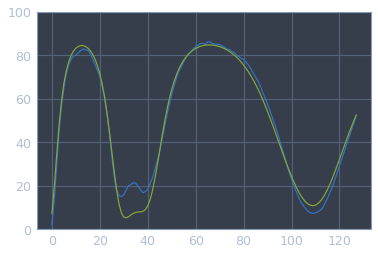

In [50]:
numbr = np.random.randint(0,2000)
yz = model.predict(x_test[numbr:numbr+3])
plt.plot(yz[0])
plt.plot(y_test[numbr])
plt.ylim([0,100])